In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('/Users/joaopimentel/Downloads/test.csv')

In [13]:
eval_df = df[df['split'] != 'train'].drop(columns = ['split', 'index'])

In [14]:
for col in eval_df.select_dtypes('number'):
  eval_df[col] = pd.qcut(eval_df[col], q = 4, duplicates = 'drop')


In [15]:
for col in ['average_word_length', 'average_sentence_length',	'average_syllables_per_word', 'percentage_monosyllabic_words', 'percentage_polysyllabic_words', 'text_length', 'type-token_ratio', 'NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN', 'PRON']:
  eval_df[col] = eval_df[col].astype(str).apply(lambda x : x.replace(',', ' -'))

In [16]:
eval_df.head()

,average_word_length,average_sentence_length,Flesch_Reading_ease_score,average_syllables_per_word,percentage_monosyllabic_words,percentage_polysyllabic_words,text_length,type-token_ratio,NOUN,VERB,ADJ,ADV,PROPN,PRON
4388,(4.041 - 4.612],(29.0 - 55.833],Standard,(1.272 - 1.429],(0.806 - 1.0],(0.103 - 0.149],(33.0 - 61.0],(0.644 - 0.75],(0.419 - 0.708],(0.037 - 0.108],(0.0385 - 0.0599],(-0.001 - 0.00673],(0.161 - 0.25],(-0.001 - 0.0151]
4389,(4.973 - 7.8],(55.833 - 101.0],Very Confusing,(1.541 - 2.25],(0.648 - 0.711],(0.103 - 0.149],(61.0 - 107.0],(0.644 - 0.75],(0.256 - 0.312],(0.138 - 0.5],(0.0599 - 0.0851],(0.00673 - 0.0231],(0.161 - 0.25],(0.0405 - 0.167]
4390,(4.041 - 4.612],(29.0 - 55.833],Difficult,(1.272 - 1.429],(0.806 - 1.0],(0.0542 - 0.103],(33.0 - 61.0],(0.286 - 0.544],(0.419 - 0.708],(-0.001 - 0.037],(0.0599 - 0.0851],(-0.001 - 0.00673],(0.161 - 0.25],(-0.001 - 0.0151]
4391,(2.774 - 4.041],(4.999 - 29.0],Difficult,(0.999 - 1.272],(0.806 - 1.0],(-0.001 - 0.0542],(33.0 - 61.0],(0.286 - 0.544],(0.419 - 0.708],(-0.001 - 0.037],(0.0385 - 0.0599],(-0.001 - 0.00673],(-0.001 - 0.102],(-0.001 - 0.0151]
4392,(2.774 - 4.041],(29.0 - 55.833],Easy,(0.999 - 1.272],(0.806 - 1.0],(-0.001 - 0.0542],(33.0 - 61.0],(0.286 - 0.544],(0.419 - 0.708],(-0.001 - 0.037],(-0.001 - 0.0385],(-0.001 - 0.00673],(0.25 - 0.889],(-0.001 - 0.0151]


In [17]:
eval_df['correct'] = np.random.choice([False, True], eval_df.shape[0])

In [18]:
eval_df.to_csv('/Users/joaopimentel/Downloads/discretized_test.csv', index = False)

In [19]:
# java caren /Users/joaopimentel/Downloads/discretized_test.csv 0.1 0.5 -Att -s, -imp0.001 -Hcorrect -ocs/Users/joaopimentel/Downloads/edr_test

# Support and confidence matter
# Last rule is to be ignored

# Plots

In [20]:
import plotnine as p9

In [140]:
subgroup_df = pd.read_csv('/Users/joaopimentel/Downloads/edr_test.csv', sep = ';').iloc[:-1][['Ant', 'Cons', 'Sup', 'Conf']]
subgroup_df['Cons'] = subgroup_df['Cons'].apply(lambda x : x.replace('correct=', '') == 'True')
subgroup_df.rename(columns = {'Cons' : 'correct', 'Sup' : 'support', 'Conf' : 'confidence', 'Ant' : 'subgroup'}, inplace = True)
l = list()
for s in subgroup_df.iterrows():
  l.append({'subgroup' : s[1]['subgroup'], 'correct' : not s[1]['correct'], 'support' : s[1]['support'], 'confidence' : 1 - s[1]['confidence']})
subgroup_df = pd.concat([subgroup_df, pd.DataFrame(l)], ignore_index = True)
subgroup_df['subgroup'] = subgroup_df['subgroup'].apply(lambda x : x.replace('  &  ', ', ').replace(' - ', ', '))

In [141]:
all_data_df = pd.read_csv('/Users/joaopimentel/Downloads/edr_test.csv', sep = ';').tail(1)[['Cons', 'Conf']]
all_data_df['Cons'] = all_data_df['Cons'].apply(lambda x : x.replace('correct=', '') == 'True')
all_data_df.rename(columns = {'Cons' : 'correct', 'Conf' : 'confidence'}, inplace = True)
all_data_df = pd.DataFrame({'correct' : [True, False], 'confidence' : [1 - all_data_df['confidence'].values[0], all_data_df['confidence'].values[0]]})
all_data_df['subgroup'] = 'All data'
all_data_df['support'] = 1.0

In [ ]:
# Count of subgroups using support * df_size

In [ ]:
# quantile_counts = df['q'].value_counts().reset_index(name = 'count').rename(columns = {'index' : 'q'}).set_index(keys = ['q']).to_dict(orient = 'index')
# quantile_text_labels = ['Very low', 'Low', 'Normal', 'High', 'Very high']
# quantile_interval_labels = [f'({np.round(quantile_intervals[i], decimals = 3)}, {np.round(quantile_intervals[i + 1], decimals = 3)}]' for i in range(len(quantile_intervals) - 1)]
# quantile_labels = [f'{quantile_text_labels[i]}\n{quantile_counts[quantile_text_labels[i]]["count"]} instances ({np.round((quantile_counts[quantile_text_labels[i]]["count"] / df.shape[0]) * 100, decimals = 3)}%)\n{quantile_interval_labels[i]}' for i in range(len(quantile_text_labels))]
# # Add quantile_interval_labels to 'q' column
# quantile_df['q'] = pd.Categorical(quantile_df['q'], categories = ['Very low', 'Low', 'Normal', 'High', 'Very high'], ordered = True)
# quantile_df['q'] = quantile_df['q'].cat.rename_categories(quantile_labels)
# quantile_df
# all_data_df = df['correct'].value_counts(normalize = True).reset_index(name = 'value').rename(columns = {'index' : 'correct'}).assign(q = 'All data')
# all_data_df['q'] = f'All data\n{df.shape[0]} instances (100%)'
# plot_df = pd.concat([quantile_df, all_data_df])
# plot_df['q'] = pd.Categorical(plot_df['q'], categories = plot_df['q'].unique())

In [142]:
plot_df = pd.concat([subgroup_df, all_data_df])
plot_df['subgroup'] = pd.Categorical(plot_df['subgroup'], categories = subgroup_df['subgroup'].sort_values(ascending = False).unique().tolist() + ['All data'])

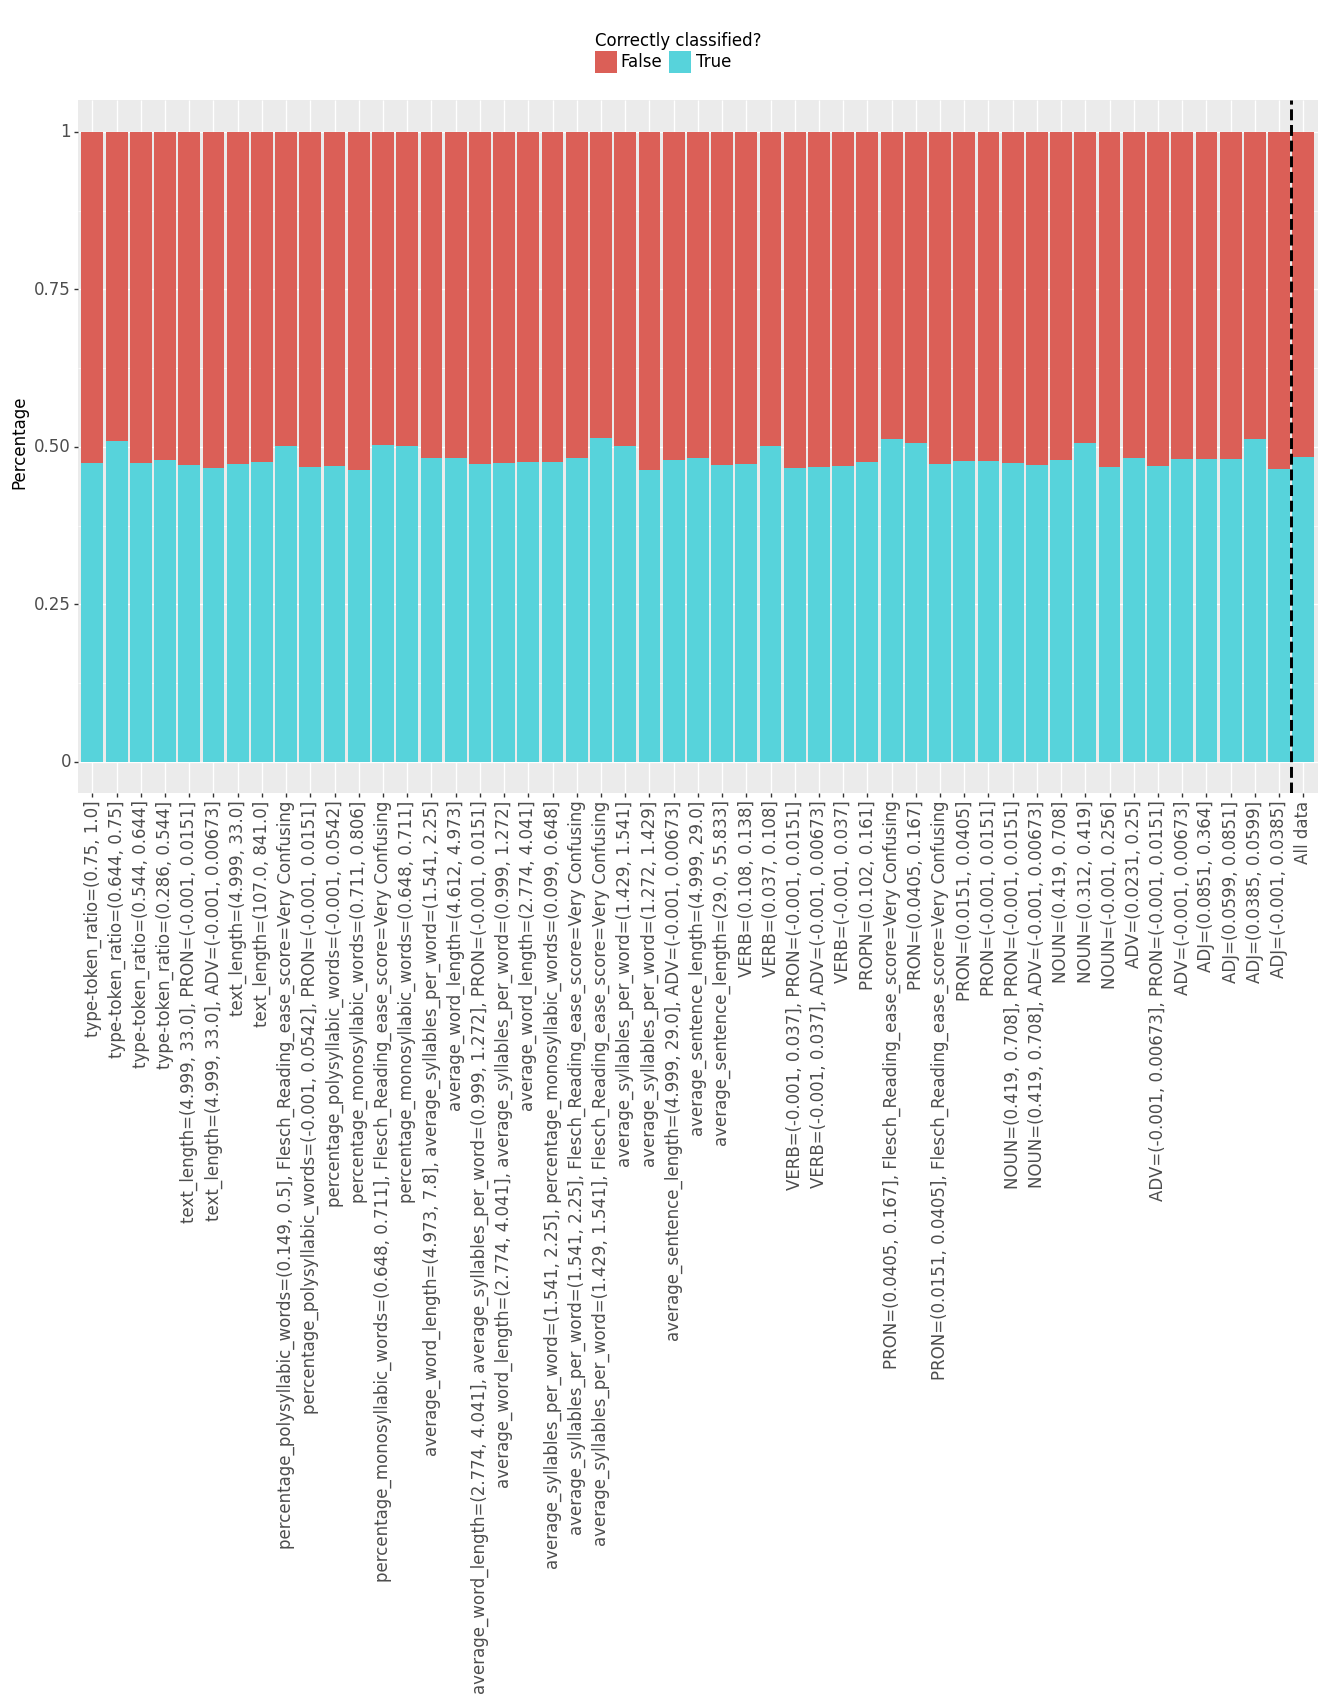

<ggplot: (821248985)>

In [146]:
p9.ggplot(
  plot_df,
  p9.aes(x = 'subgroup', y = 'confidence', fill = 'correct')
) + \
  p9.geom_col() + \
  p9.geom_vline(xintercept = subgroup_df['subgroup'].nunique() + 0.5, linetype = 'dashed', size = 1.2) + \
  p9.ylab('Percentage') + \
  p9.xlab('') + \
  p9.labs(fill = 'Correctly classified?') + \
  p9.theme_gray() + \
  p9.theme(
    legend_position = 'top',
    figure_size = (16, 9),
    text = p9.element_text(size = 12),
    axis_text_x = p9.element_text(rotation = 90)
  )

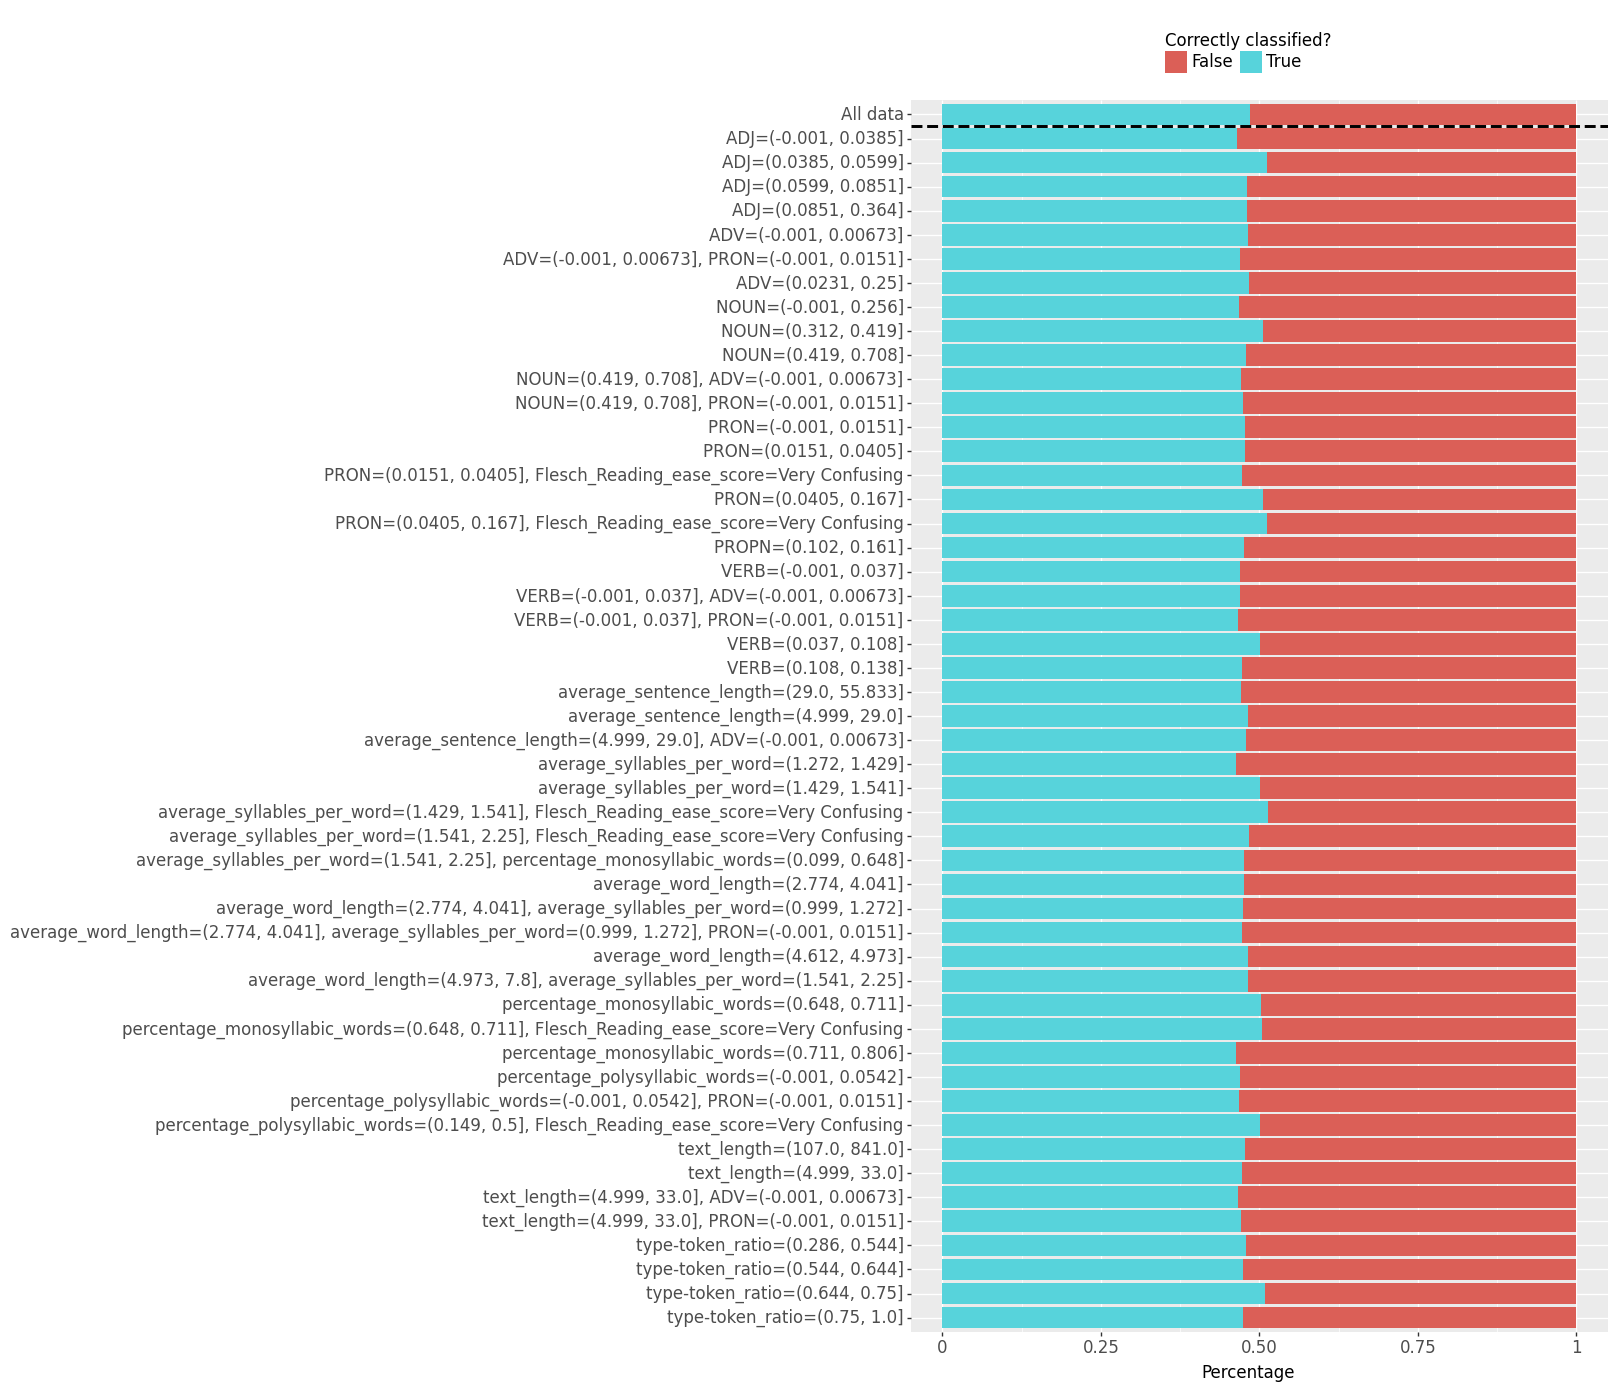

<ggplot: (818451514)>

In [143]:
p9.ggplot(
  plot_df,
  p9.aes(x = 'subgroup', y = 'confidence', fill = 'correct')
) + \
  p9.geom_col() + \
  p9.geom_vline(xintercept = subgroup_df['subgroup'].nunique() + 0.5, linetype = 'dashed', size = 1.2) + \
  p9.ylab('Percentage') + \
  p9.xlab('') + \
  p9.labs(fill = 'Correctly classified?') + \
  p9.theme_gray() + \
  p9.coord_flip() + \
  p9.theme(
    legend_position = 'top',
    figure_size = (9, 16),
    text = p9.element_text(size = 12)
  )